# Traveling front solution to the SIR dynamics with nearest-neighbors interaction.

[Index](../0-index.ipynb)

Here we compute the shape of the traveling front solution to the SIR dynamics with nearest-neighbors interactions on a 2d lattice.

## Imports and global variables

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mco
import matplotlib.gridspec as mgs
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib import animation
plt.rcParams['svg.fonttype'] = 'none'

from IPython.display import HTML
from IPython.display import Image

In [3]:
import sys
sys.path.append('../code')
from functions import wave_front_get_ode_sol

## Model
We consider the traveling wave solution:
\begin{align}
  \begin{aligned}
    S(x,t) &= g(x - vt), \\
    I(x, t) &= h(x-vt),
  \end{aligned}
\end{align}
of the number of susceptible and recovered individuals on a 1D lattice.

The function $g$ and $h$ satisfy the ODE:
\begin{align}
    f' &= -\frac{2 \sqrt{1-\gamma}}{g} f + \left(\frac{\gamma}{g} -1 \right) h , \\
    h' &= f, \\
    g' &= -f + \frac{\gamma}{2 \sqrt{1-\gamma}} h.
\end{align}


We solve this ODE with the initial condition
\begin{align}
\begin{pmatrix}
  0 &
  0 &
  S_\infty
\end{pmatrix}
\end{align}
where $S_\infty$ is the residual fraction of susceptible individuals at $t \to \infty$. It is determined by solving:
\begin{align}
  1 = e^{-\nu_\infty} + \gamma \nu_\infty,
\end{align}
with $S = e^{-\nu}$.

## Parameters

In [4]:
figdir = Path('..') / 'figures' / '11-ode_traveling_front'
if not figdir.is_dir():
    figdir.mkdir(parents=True, exist_ok=True)
print(figdir)

../figures/11-ode_traveling_front


In [5]:
exts = ['.png', '.svg']
dpi=300

In [6]:
gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]      # inverse recovery time
s0 = 1.          # initial fraction of susceptible individuals
eps = 5.0e-4     # susceptible derivative lower bound
# print("gamma = {:.4f}    eps = {:.2e}".format(gamma,eps))

## Determine residual susceptible fraction

In [7]:
from functions import get_residual_susceptible

In [8]:
data_list = []

for gamma in gamma_list:
    # determine final nu
    sinf = get_residual_susceptible(gamma, s0=1.)
    xinf = -np.log(sinf)

    # construct an initial condition for the ODE
    feps = 1.0e-5
    while True:
        sf = s0*np.exp(-(xinf - feps))
        jf = 1. - gamma*(xinf - feps)-sf
        if (gamma/(2.*np.sqrt(1-gamma))*jf > eps):
            break
        else:
            feps *= 3.
    print("s_inf = {:.4e}    s_f = {:.4e}    j_f = {:.4e}".format(sinf, sf, jf))

#     gamma/(2.*np.sqrt(1-gamma))*jf
    X0 = np.array([0.,jf,sf])
    
    # solve the ODE
    Z, S, I, S_der = wave_front_get_ode_sol(X0, gamma, npts=10000, zmax=1000, eps=1.0e-8, method='BDF')
    
    # center
    i0 = np.argmin(np.abs(S-0.5*(sinf+1.)))
    z0 = Z[i0]
    Z = Z-z0
    
    # add to list
    data_list.append(np.array([Z, S, I]))

s_inf = 4.5421e-05    s_f = 5.5301e-05    j_f = 1.9673e-02
s_inf = 6.9772e-03    s_f = 7.4503e-03    j_f = 1.2649e-02
s_inf = 4.0882e-02    s_f = 4.1786e-02    j_f = 5.6571e-03
s_inf = 1.0736e-01    s_f = 1.0814e-01    j_f = 2.1305e-03
s_inf = 2.0319e-01    s_f = 2.0467e-01    j_f = 2.1583e-03
s_inf = 3.2424e-01    s_f = 3.2662e-01    j_f = 2.0016e-03
s_inf = 4.6700e-01    s_f = 4.7041e-01    j_f = 1.6862e-03
s_inf = 6.2863e-01    s_f = 6.3323e-01    j_f = 1.2325e-03
s_inf = 8.0690e-01    s_f = 8.1280e-01    j_f = 6.5721e-04


In [9]:
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()

for i in range(len(gamma_list)):
    gamma = gamma_list[i]
    Z, S, I = data_list[i]
    label="$\\gamma = {:.2f}$".format(gamma)
    ax.plot(Z, S, label=label)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
ax.set_ylim(0,1.)
# ax.set_yscale('log')
# ax.set_xlim(0,1500)
ax.set_xlabel('z', fontsize='large')
ax.set_ylabel('S', fontsize='large')
ax.legend(loc='best', frameon=False, fontsize='large')
fig.tight_layout()

fname = 'profiles_susceptible'
# fname = 'domega_tot'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../figures/11-ode_traveling_front/profiles_susceptible.png
Written file: ../figures/11-ode_traveling_front/profiles_susceptible.svg


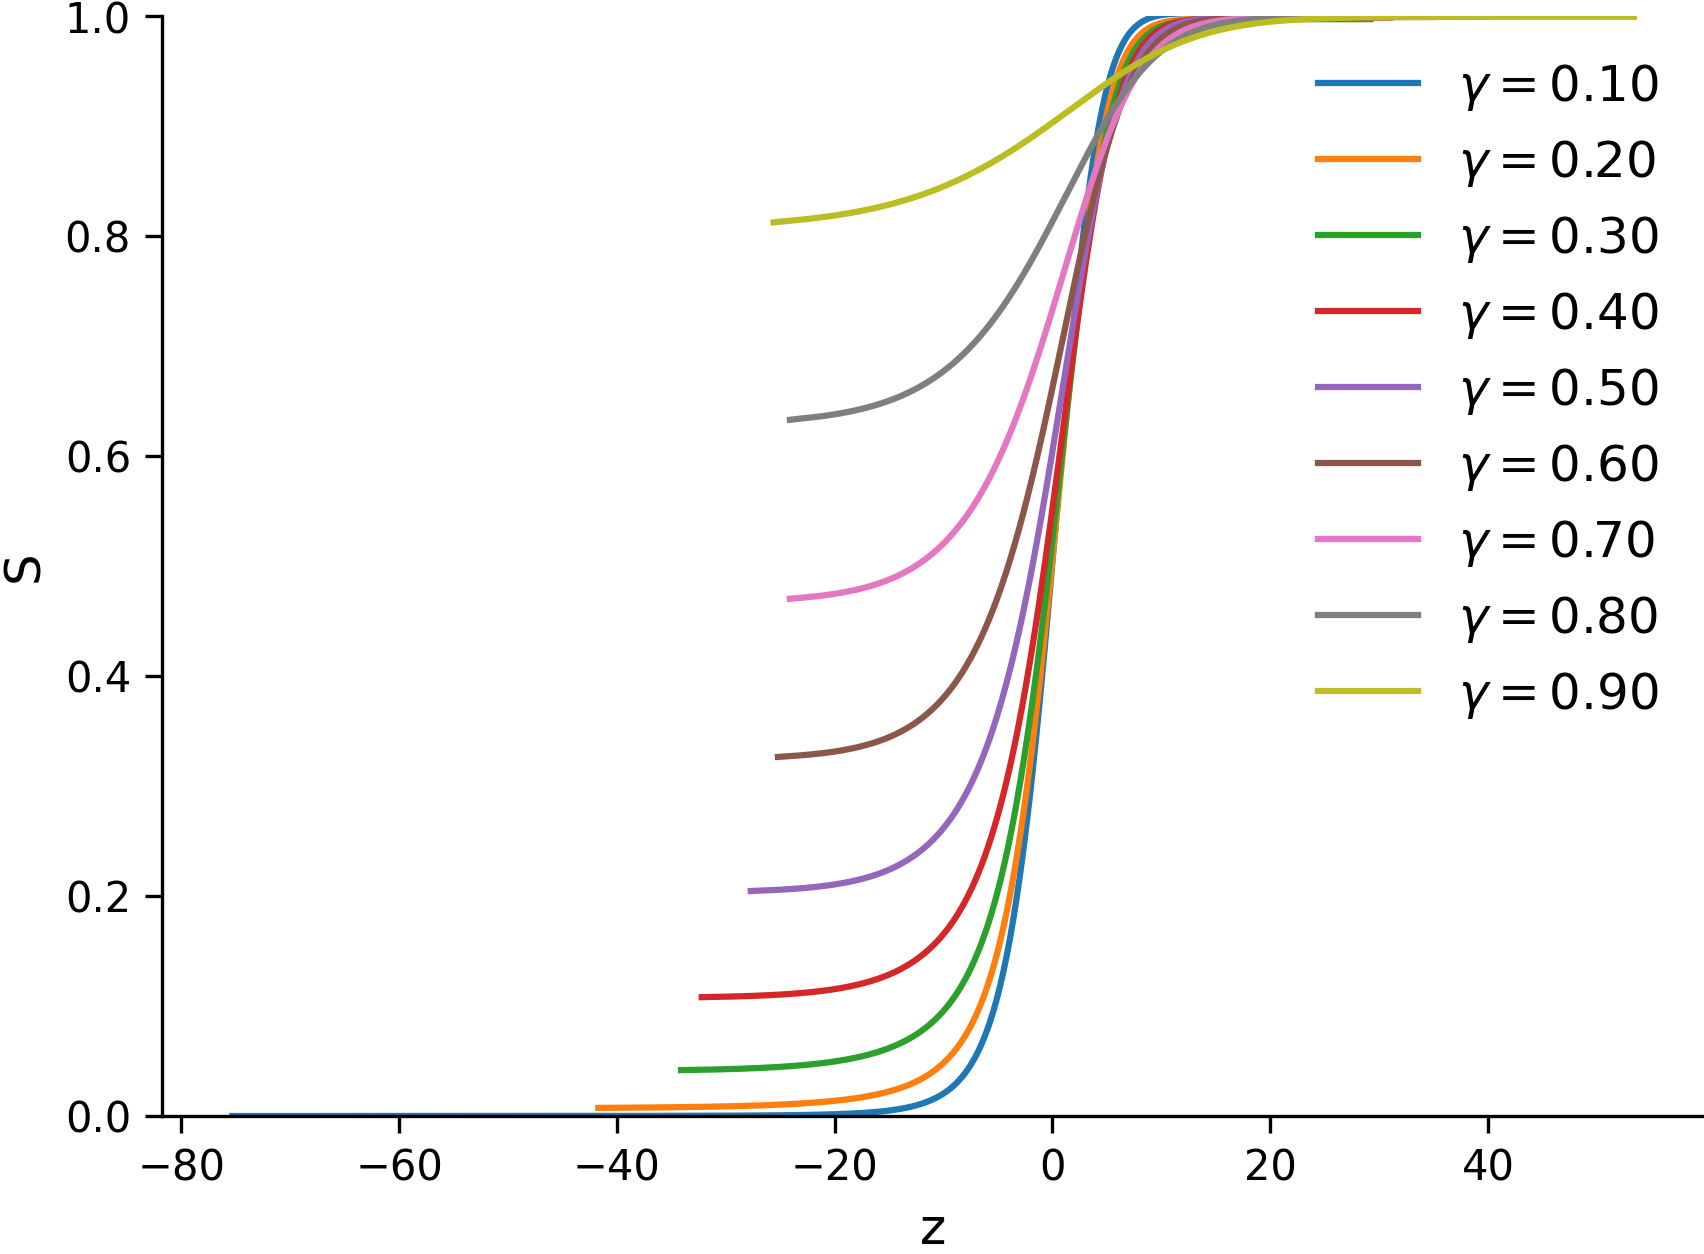

In [10]:
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [11]:
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()

for i in range(len(gamma_list)):
    gamma = gamma_list[i]
    Z, S, I = data_list[i]
    label="$\\gamma = {:.2f}$".format(gamma)
    ax.plot(Z, I, label=label)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
ax.set_ylim(0,1.)
# ax.set_yscale('log')
# ax.set_xlim(0,1500)
ax.set_xlabel('z', fontsize='large')
ax.set_ylabel('I', fontsize='large')
ax.legend(loc='best', frameon=False, fontsize='large')
fig.tight_layout()

fname = 'profiles_infected'
# fname = 'domega_tot'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../figures/11-ode_traveling_front/profiles_infected.png
Written file: ../figures/11-ode_traveling_front/profiles_infected.svg


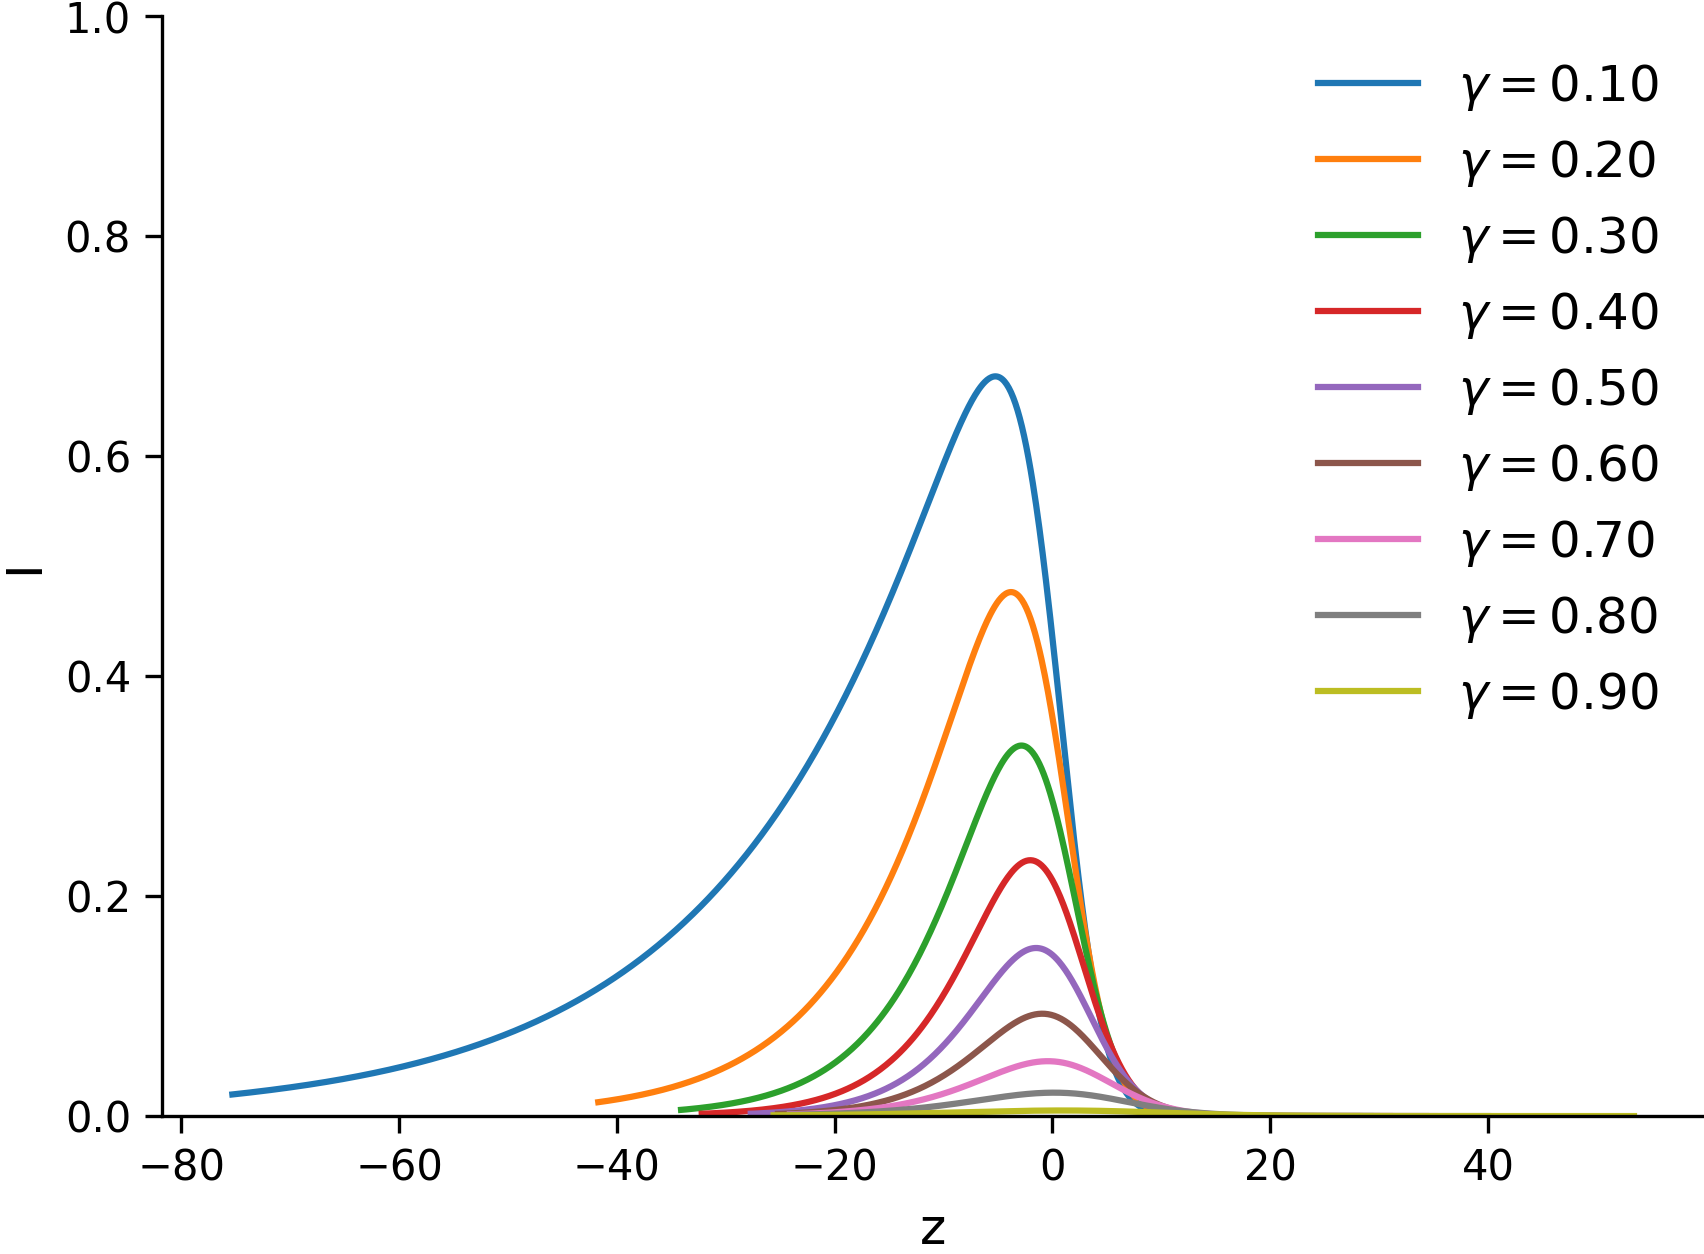

In [12]:
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)